In [5]:
#Import dataset
import pandas as pd
import numpy as np

# Read the stored dataset 
data = pd.read_csv ( 'cardio_train.csv' , sep = ";" )
# change the age from days to years
data['age'] = data['age'] / 360
# change it to int for the data visualization
data['age'] = data['age'].astype(int)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,62,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
# the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int32  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.6 MB


In [7]:
# checking the values of gender parameter
data['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [8]:
# checking the values of cholestrol parameter
data['cholesterol'].value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

In [9]:
# The mean of all data set
data.mean()

id             50471.480397
age               53.583599
gender             1.349519
height           164.362217
weight            74.203027
ap_hi            128.829584
ap_lo             96.650092
cholesterol        1.366806
gluc               1.226447
smoke              0.088051
alco               0.053881
active             0.803986
cardio             0.499589
dtype: float64

In [10]:
# describing the Cardio statistics
import statistics

# The mean 
mu = statistics.mean(data['cardio'])
print ( " The Mean of cardio = " , mu )
# The Standard Deviation
st = statistics.stdev(data['cardio'])
print(  " The Standard Deviation of cardio = " , st )

 The Mean of cardio =  0.4995887505230805
 The Standard Deviation of cardio =  0.5000034383632124


In [11]:
# drop from the data 13 column->cardio as it is the output , and the id as it has no effect on the output
# X have 10 parameters
X = data.drop(['cardio',  'height' ,'id'], axis=1)
y = data['cardio']

X

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,62,1,69.0,130,80,2,2,0,0,1
1,40,1,71.0,110,70,1,1,0,0,1
2,60,1,70.0,120,80,1,1,0,0,1
3,40,2,85.0,120,80,1,1,1,1,1
4,64,1,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
69296,53,2,76.0,120,80,1,1,1,0,1
69297,62,1,126.0,140,90,2,2,0,0,1
69298,52,2,105.0,180,90,3,1,0,1,0
69299,62,1,72.0,135,80,1,2,0,0,0


<AxesSubplot:xlabel='age', ylabel='count'>

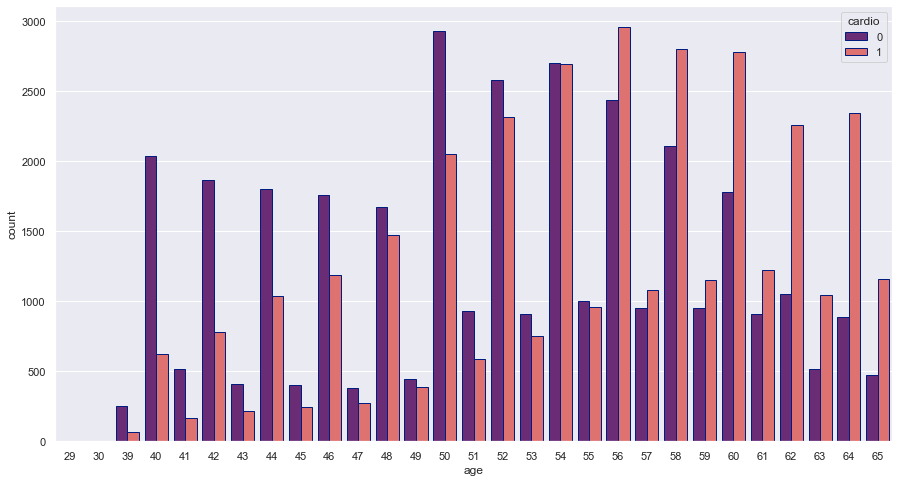

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# the data visualizations:
# Estimation of how many have cardio or not apon different age intervals
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='age',hue='cardio',data=data,palette='magma',edgecolor=sns.color_palette('dark',n_colors=1))

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

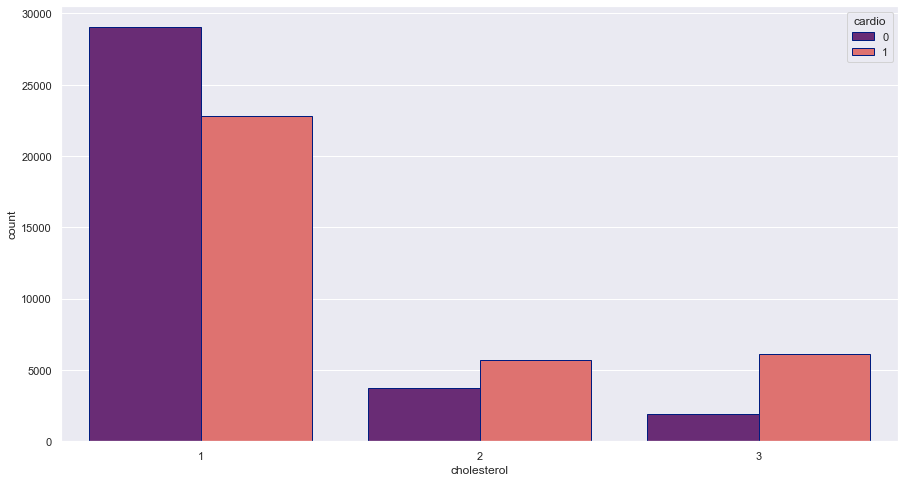

In [13]:
# An Estimation to the relation between cholesterol and cardio Disease
sns.countplot(x="cholesterol", hue="cardio", data=data, palette="magma", edgecolor= sns.color_palette("dark", n_colors=1))

<AxesSubplot:xlabel='weight', ylabel='Count'>

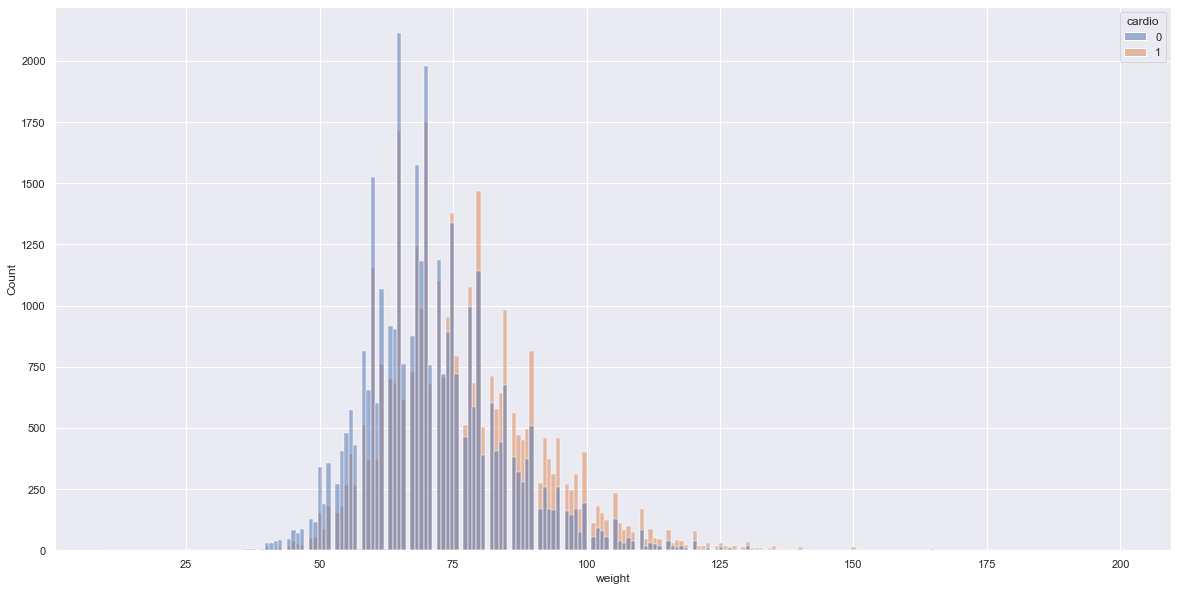

In [14]:
# A plot that proves that hieght deos not significantly affect the chance of having cardio
sns.set(rc = {'figure.figsize':(20,10)})
sns.histplot(data=data, x="weight",hue='cardio',color="purple")

<AxesSubplot:xlabel='height', ylabel='Count'>

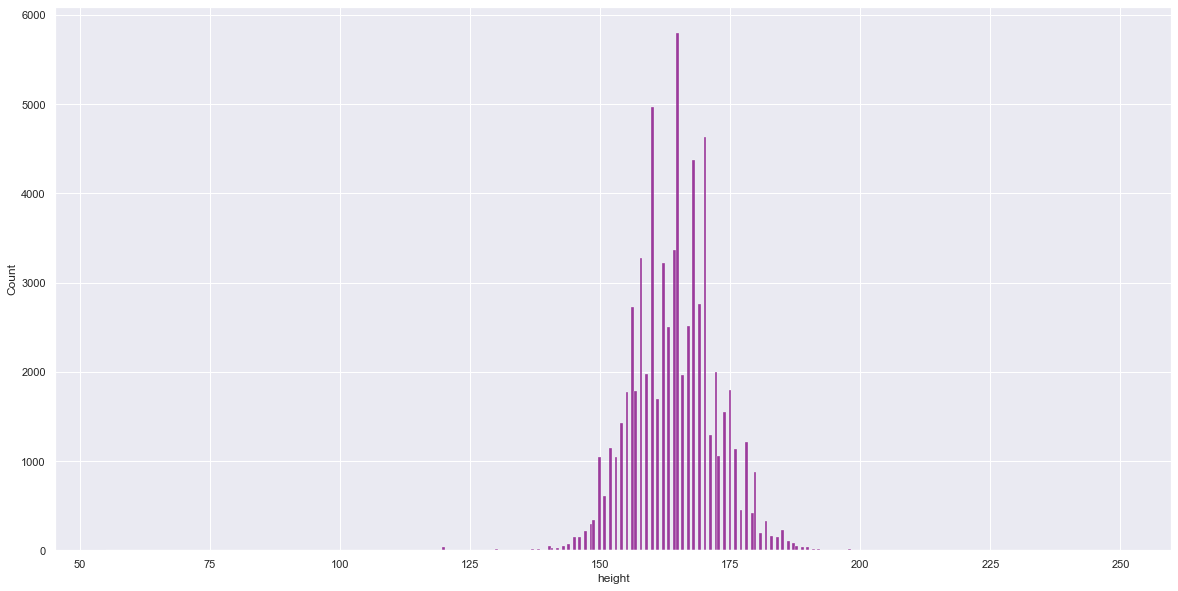

In [16]:
# A plot that proves that hieght deos not significantly affect the chance of having cardio
sns.set(rc = {'figure.figsize':(20,10)})
sns.histplot(data=data, x="height",color="purple")

<AxesSubplot:xlabel='cardio', ylabel='weight'>

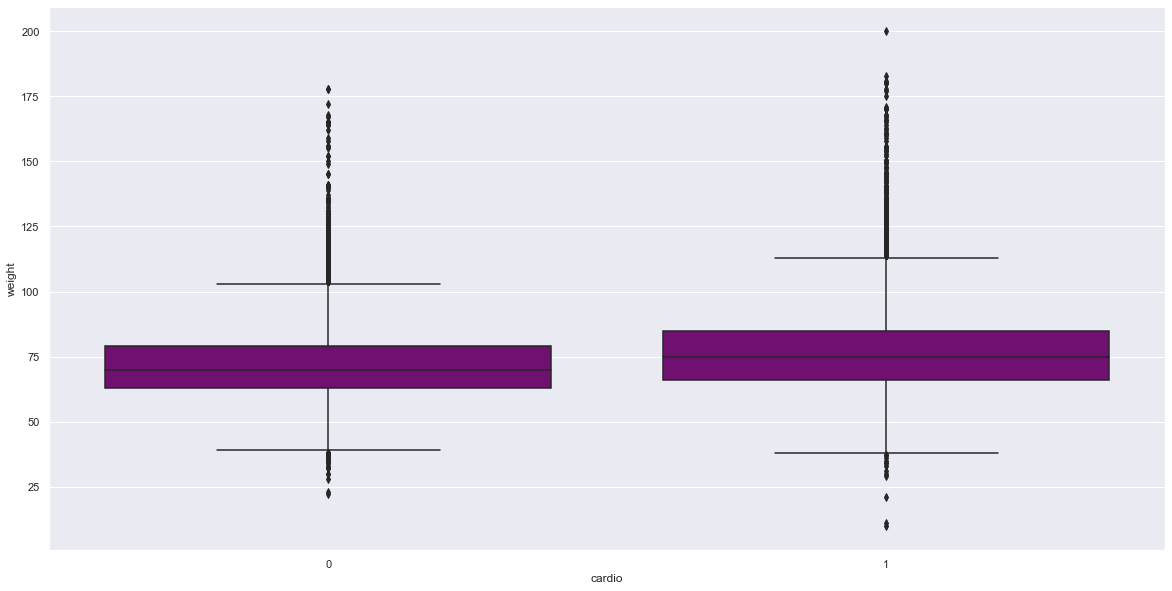

In [38]:
sns.boxplot(data=data, x="cardio",y="weight",color="purple")

<AxesSubplot:xlabel='cardio', ylabel='age'>

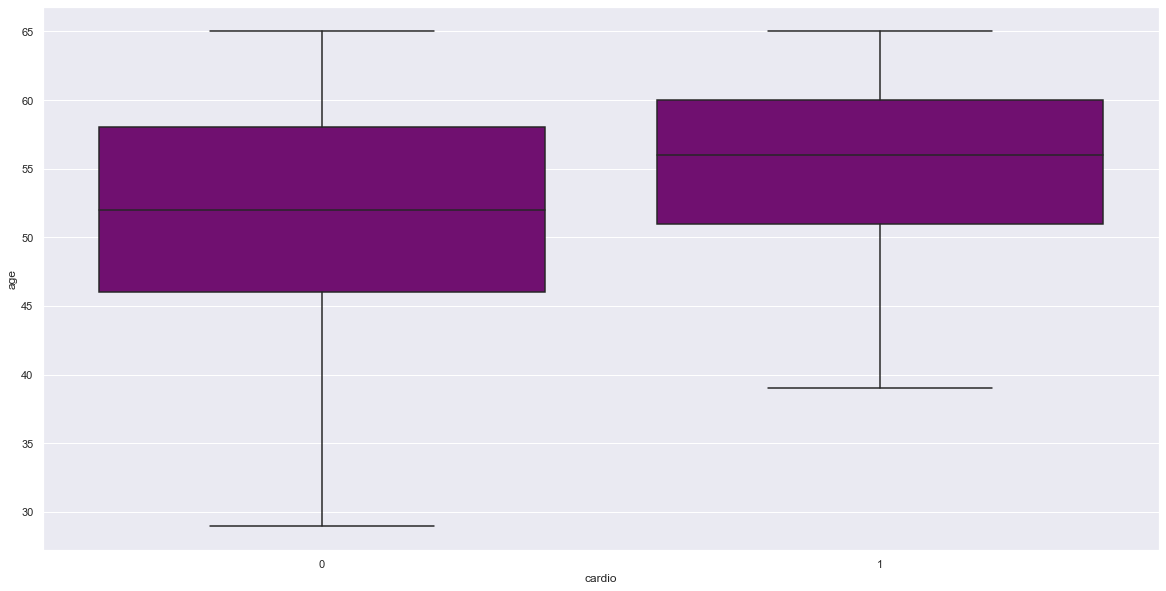

In [39]:
sns.boxplot(data=data, x="cardio",y="age",color="purple")

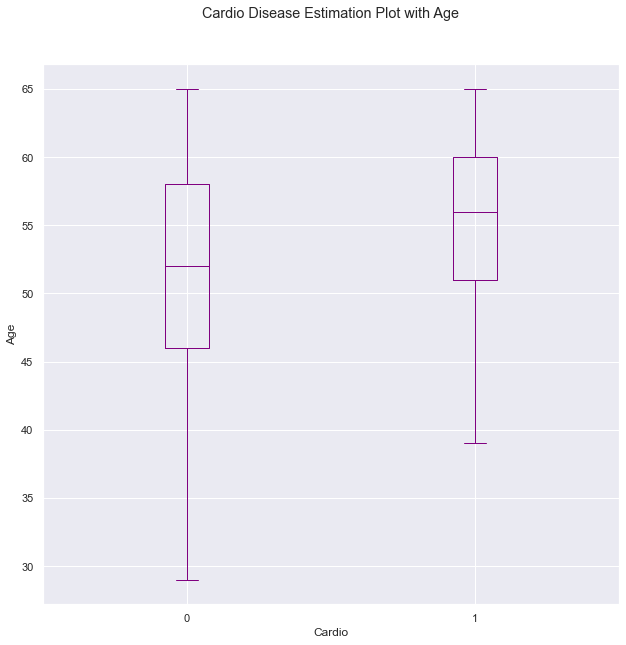

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
data.boxplot('age', 'cardio', ax=ax, color='purple')
plt.suptitle('Cardio Disease Estimation Plot with Age')
plt.title('')
plt.xlabel('Cardio')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.show()

In [42]:
#Splitting to training and testing
from sklearn.model_selection import train_test_split
# split the data into 70% train, 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_test.shape)

(48510, 10)
(20791,)


In [43]:
X_train

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
65893,65,2,80.0,120,60,1,1,0,0,1
3099,60,1,60.0,160,90,3,1,0,0,0
67617,60,1,63.0,160,90,1,1,0,0,1
20009,40,2,72.0,130,70,1,1,1,0,1
36775,60,1,67.0,150,90,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
66733,54,1,82.0,130,80,1,1,0,0,1
29166,54,2,60.0,120,79,1,1,0,0,0
23439,60,2,80.0,160,110,2,1,0,0,1
47855,42,2,74.0,120,80,1,1,1,0,1


In [44]:
#Train the model
from sklearn.neural_network import MLPClassifier

In [45]:
mlp = MLPClassifier( activation='relu')
mlp

MLPClassifier()

In [46]:
#Training
# fit 70% of the data to do the train
mlp.fit(X_train,y_train)

MLPClassifier()

In [47]:
#Testing
# predict the 30% of the data set as a test for the training phase on 70% of the data
pred = mlp.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
y_pred = mlp.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))
error

0.5263027265396406

In [50]:
from sklearn.metrics import accuracy_score

# a percentage to hoe accurate the model test the data
acc = accuracy_score(y_test, pred)
# the model is good cause acc = 72.2 %

In [51]:
print( " The accuracy of the model =", acc * 100)

 The accuracy of the model = 72.2331778173248


In [52]:
mlp.predict([[20,2,62.0,130,70,2,2,0,0,1]])

array([1], dtype=int64)

In [53]:
mlp.predict([[ 62.413889,1,69.0,130,80,2,2,0,0,1 ]])  

array([1], dtype=int64)

In [54]:
Patient = np.array( [[ 62,1,69.0,130,80,2,2,0,0,1 ]])
Patient

array([[ 62.,   1.,  69., 130.,  80.,   2.,   2.,   0.,   0.,   1.]])

In [55]:
Cardio_predict = mlp.predict(Patient)
Cardio_predict

array([1], dtype=int64)

In [56]:
import pickle

data = {"model": mlp}
with open('Predict_model.pkl', 'wb') as file:
    pickle.dump(data, file)
    
with open('Predict_model.pkl', 'rb') as file:
    data = pickle.load(file)    
 # pridict using the saved trained model   
mlp_loaded = data["model"]
Card_predict = mlp_loaded.predict( Patient )
Card_predict

array([1], dtype=int64)